In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ReidentificationTests.csv")

In [3]:
MODELS  = ["VGG-Face", "Facenet", "OpenFace", "Ensemble"]

def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x), string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str):
    print(title)

    for model in MODELS:
        df_model = filterData(df, 'Identification_Model == "%s"' % model)
        for index in range(len(df_model)):
            colum: pd.DataFrame = df.iloc[index]
            label: str = model \
                if model == MODELS[-1] \
                else colum['Metric']
            plt.plot(stringToLst(colum["Values"]),
                     label = label)
            plt.xlabel("Posiciones de la calificación")
            plt.ylabel("Precisión")
            plt.grid(True)
            plt.legend(loc='lower right')
            plt.title(model)
        plt.show()
        print(model)
        print(df_model[['Metric', 'mAPtop1', 'mAPtop5']])

def plotCMC(df, query, title):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title)

## RetinaFace

RetinaFace
VGG-Face
          Metric  mAPtop1   mAPtop5
1         cosine      0.0  0.000000
16     euclidean      0.0  0.002050
17  euclidean_l2      0.0  0.001833
Facenet
          Metric  mAPtop1   mAPtop5
18        cosine      0.0  0.000202
19     euclidean      0.0  0.000370
20  euclidean_l2      0.0  0.000000
OpenFace
          Metric   mAPtop1   mAPtop5
21        cosine  0.006667  0.006667
22     euclidean  0.000000  0.002500
23  euclidean_l2  0.006667  0.006667
Ensemble
    Metric  mAPtop1   mAPtop5
27  cosine      0.0  0.011111


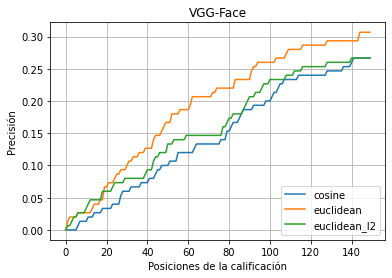

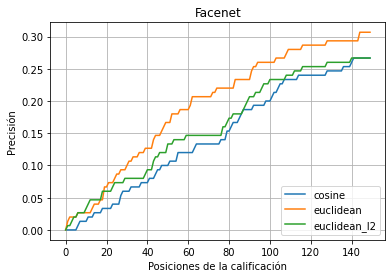

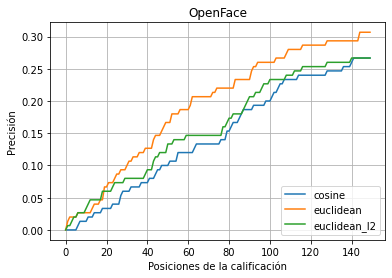

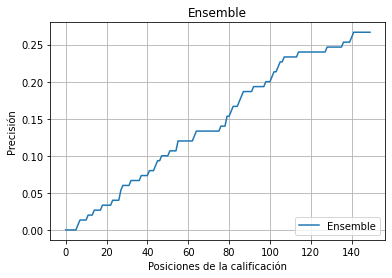

In [4]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

RetinaFace + recorte
VGG-Face
         Metric   mAPtop1   mAPtop5
3        cosine  0.000952  0.002786
4     euclidean  0.000741  0.001296
8  euclidean_l2  0.000000  0.002296
Facenet
          Metric   mAPtop1   mAPtop5
5      euclidean  0.002222  0.003241
9         cosine  0.000000  0.000984
10  euclidean_l2  0.002222  0.002222
OpenFace
          Metric   mAPtop1   mAPtop5
6      euclidean  0.006667  0.008333
11        cosine  0.006667  0.008000
12  euclidean_l2  0.000000  0.001333
Ensemble
  Metric  mAPtop1   mAPtop5
7    NaN      0.0  0.023148


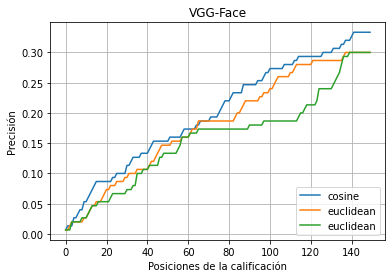

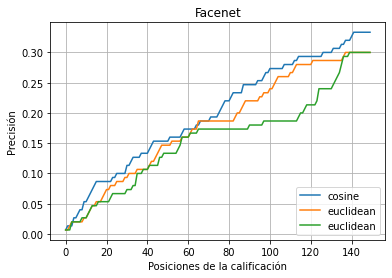

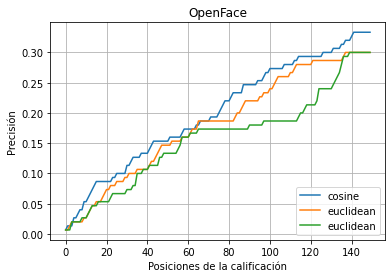

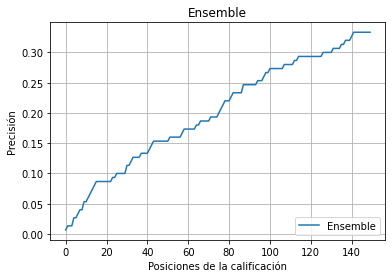

In [5]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

## Img2pose

Img2pose
VGG-Face
          Metric   mAPtop1   mAPtop5
2         cosine  0.000000  0.000278
28     euclidean  0.002222  0.003948
29  euclidean_l2  0.000000  0.000519
Facenet
          Metric   mAPtop1   mAPtop5
30        cosine  0.000667  0.000815
31     euclidean  0.000000  0.000159
32  euclidean_l2  0.007273  0.007717
OpenFace
          Metric   mAPtop1   mAPtop5
33        cosine  0.000000  0.002222
34     euclidean  0.006667  0.010000
35  euclidean_l2  0.000000  0.000000
Ensemble
    Metric   mAPtop1   mAPtop5
39  cosine  0.033333  0.044444


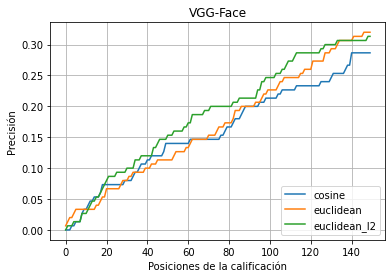

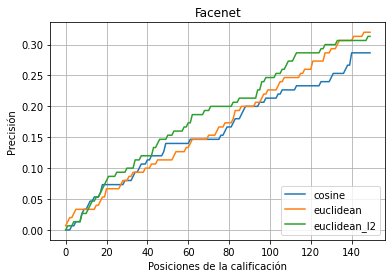

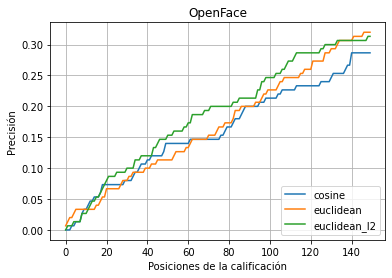

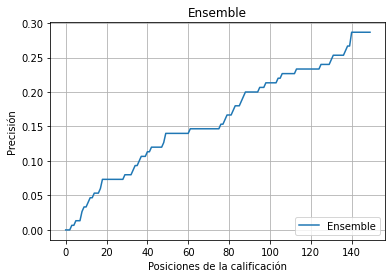

In [6]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

Img2pose + recorte de imagenes
VGG-Face
          Metric   mAPtop1   mAPtop5
0         cosine  0.001333  0.004022
40     euclidean  0.000000  0.000444
41  euclidean_l2  0.002222  0.003152
Facenet
          Metric   mAPtop1   mAPtop5
42        cosine  0.000000  0.000251
43     euclidean  0.000667  0.000667
44  euclidean_l2  0.002000  0.002148
OpenFace
          Metric   mAPtop1   mAPtop5
45        cosine  0.006667  0.006667
46     euclidean  0.000000  0.001667
47  euclidean_l2  0.000000  0.005000
Ensemble
    Metric   mAPtop1   mAPtop5
51  cosine  0.016667  0.016667


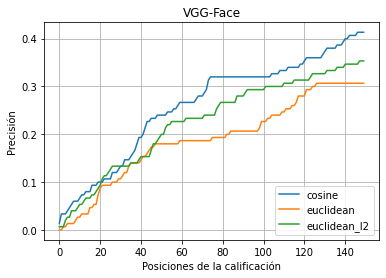

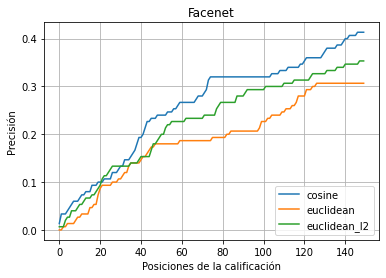

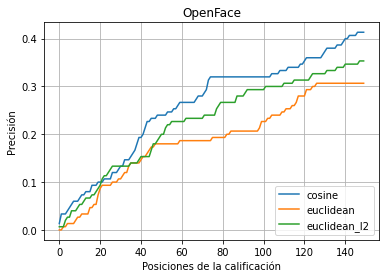

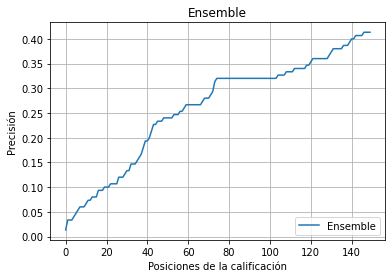

In [7]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

In [8]:
from sklearn.metrics import average_precision_score

def calculateAveragePrecision(dorsalList: list, query: int) -> tuple:
        averagePrecision = []
        count = 0
        print(dorsalList)
        for index, dorsal in enumerate(dorsalList):
            if dorsal == query:
                count += 1
                averagePrecision.append(count / (index + 1))
            else:
                averagePrecision.append(0)

        return averagePrecision[0], sum(averagePrecision)

dorsal = 1
dorsalList = [1,0,1,2,2,3,2,1,4,5,6,7]
countTP = 1 / dorsalList.count(dorsal)
res = calculateAveragePrecision(dorsalList[0:5], dorsal)
print(countTP * res[0])
print(countTP * res[1])


print(average_precision_score())

[1, 0, 1, 2, 2]
0.3333333333333333
0.5555555555555555
